# Hill Climbing : Introduction

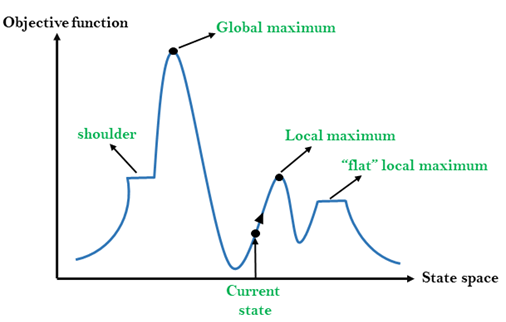

## 1. Simple Hill Climbing:
- Ascending to the highest peak of a mountain
- Moves are determined by the climber's steps
- Moves if the next step is better or stays in the same position

## 2. Steepest-ascent Hill Climbing:
- Comparing all succeeding nodes
- Selecting the one closest to the answer
- Similar to best-first search

## 3. Stochastic Hill Climbing:
- Selecting one node at random
- Determining whether to enlarge it or look for a better one

## 4. Random-restart Hill Climbing:
- Try-and-try approach
- Iteratively searching the node and choosing the best candidate
- Success determined by the hill's form

# Problem Definition: Travelling Salesman Problem

* Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

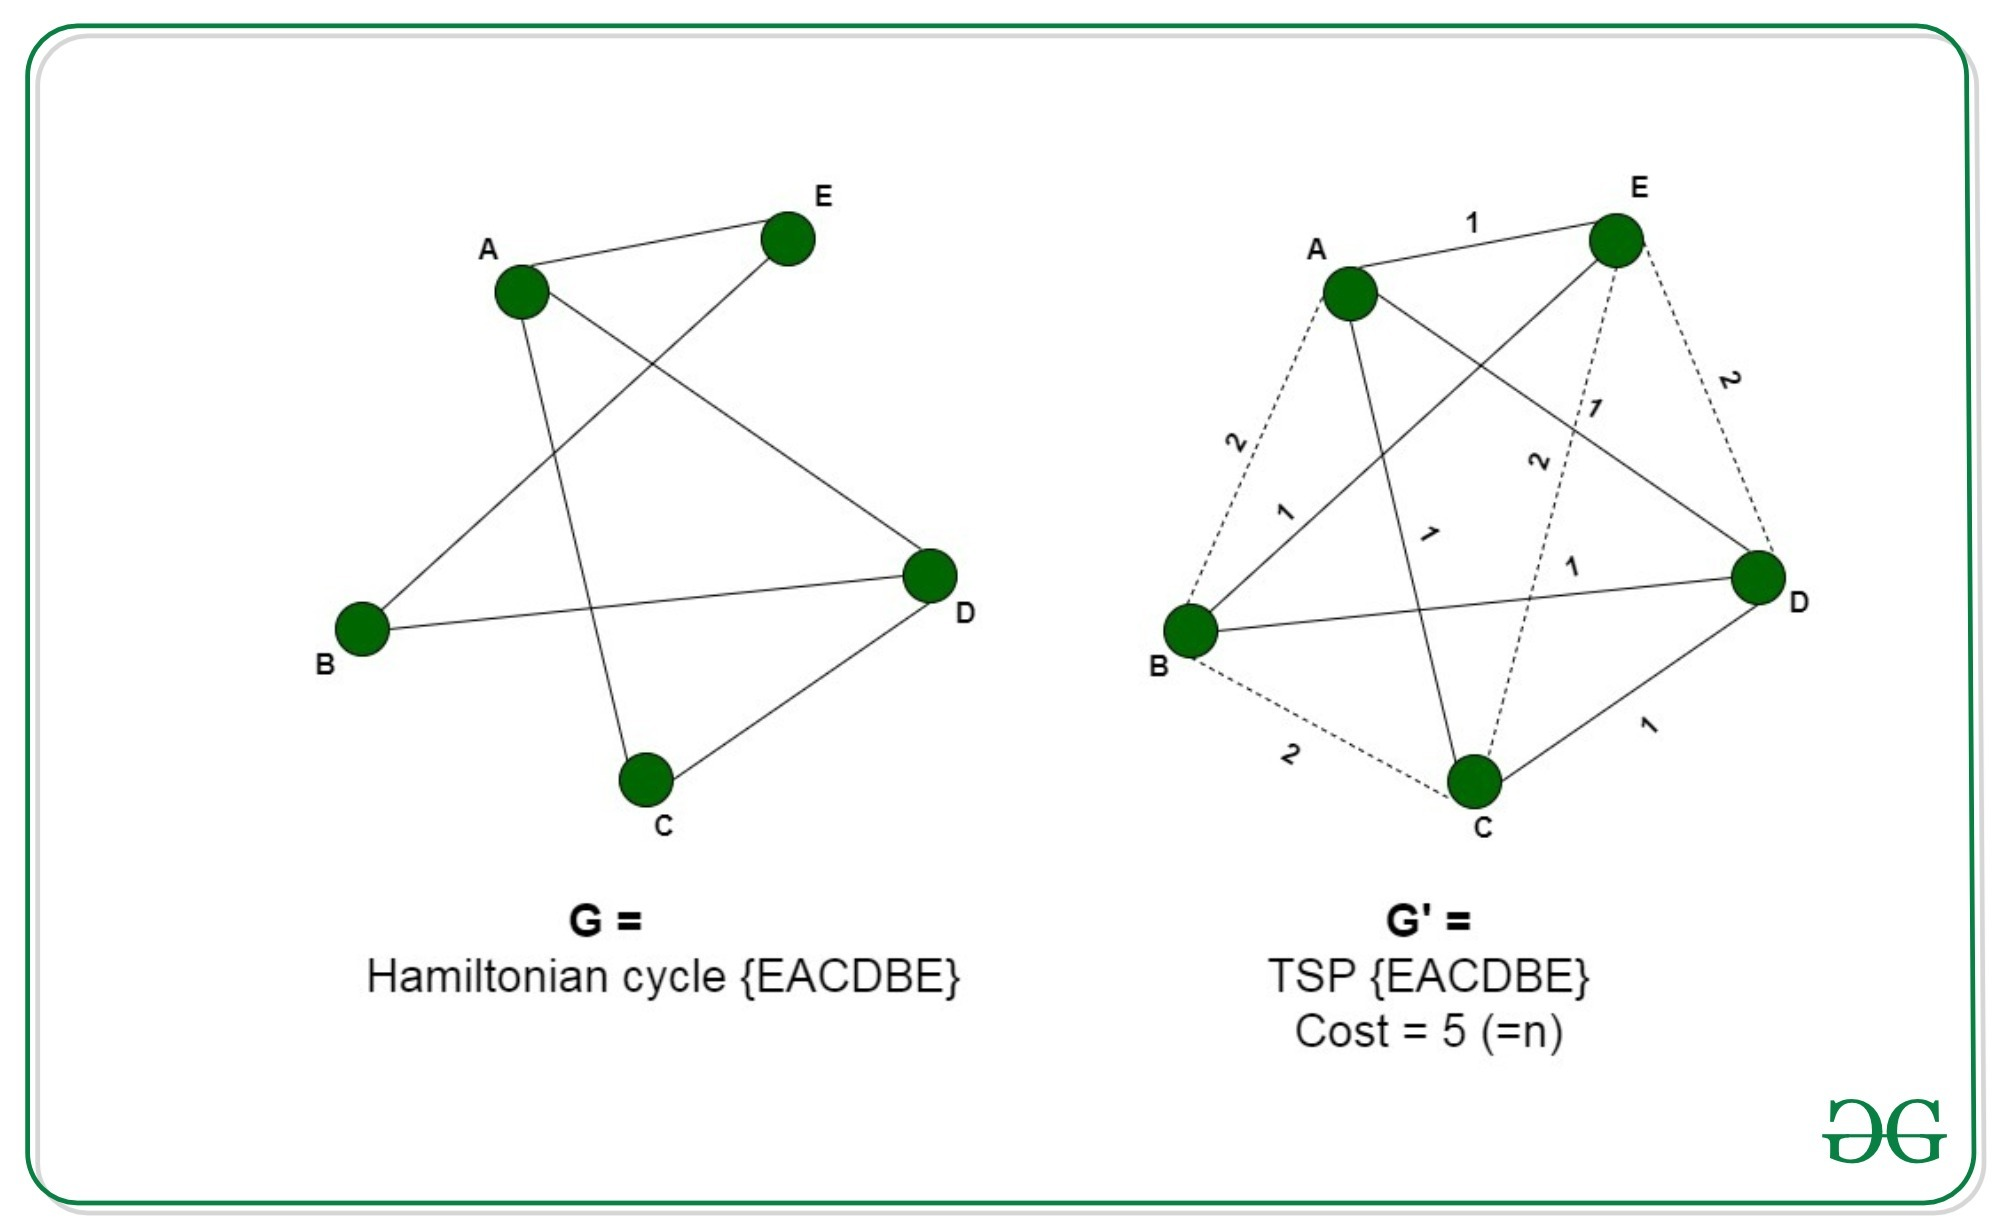

## Import Libraries

In [ ]:
import numpy as np
from copy import deepcopy
from copy import copy
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
! wget https://www.dropbox.com/scl/fi/pn4lir0yjsn25x6u7rt0e/Sample.tsp?rlkey=4n8fdqofiaq83b7a6suy6djlo&dl=1

#

--2024-04-01 14:02:51--  https://www.dropbox.com/scl/fi/pn4lir0yjsn25x6u7rt0e/Sample.tsp?rlkey=4n8fdqofiaq83b7a6suy6djlo
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5a9501308943fd68580ae092a.dl.dropboxusercontent.com/cd/0/inline/CQPy8ggvXzteEXjckZLzKi3UF9KTJ7qc4CGtHCzEjKNEjWYbwo0Ub8HKAWCUOqKEAUXKpZmnF8Sds0u055Ku26RtfdEZskm_JB8D3fhXWmO1YxwW8cHsnYqmVmWX2EiWwF830qs-C4b3LMCTFO6rp1VY/file# [following]
--2024-04-01 14:02:52--  https://ucf5a9501308943fd68580ae092a.dl.dropboxusercontent.com/cd/0/inline/CQPy8ggvXzteEXjckZLzKi3UF9KTJ7qc4CGtHCzEjKNEjWYbwo0Ub8HKAWCUOqKEAUXKpZmnF8Sds0u055Ku26RtfdEZskm_JB8D3fhXWmO1YxwW8cHsnYqmVmWX2EiWwF830qs-C4b3LMCTFO6rp1VY/file
Resolving ucf5a9501308943fd68580ae092a.dl.dropboxusercontent.com (ucf5a9501308943fd68580ae092a.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100

## Load Data

In [ ]:
with open('Sample.tsp?rlkey=4n8fdqofiaq83b7a6suy6djlo') as f:
    file = f.read().split("\n")
    #print(file)
    index=[]
    x=[]
    y = []
    for i in file:
        a , b, c = i.split()
        index.append(int(a)-1) # in here I change city numbers from 1 to m into 0 to m-1 to be same as list index
        x.append(float(b))
        y.append(float(c))
print(index)
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[11003.6111, 11108.6111, 11133.3333, 11155.8333, 11183.3333, 11297.5, 11310.2778, 11416.6667, 11423.8889, 11438.3333]
[42102.5, 42373.8889, 42885.8333, 42712.5, 42933.3333, 42853.3333, 42929.4444, 42983.3333, 43000.2778, 42057.2222]


## Display Data

<ipython-input-4-b100e4e3ae94>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


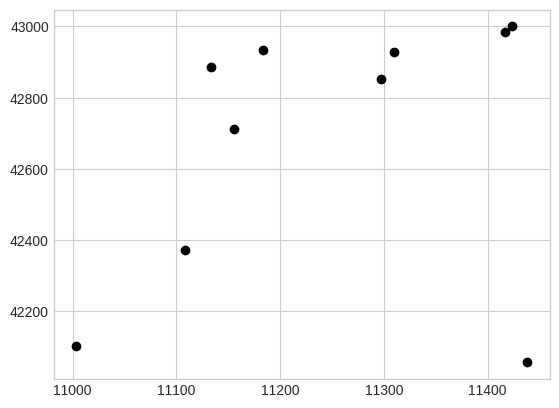

In [ ]:
plt.style.use('seaborn-whitegrid')

plt.plot(x, y, 'o', color='black');

# Implementation

## def HILL-CLIMBING(problem)
- return a state that is a (global) maximum
- input: problem, a problem
- local variables:
    - current, a node.
    - neighbor, a node.

* current = MAKE-NODE(INITIAL-STATE[problem])
* loop do
    * neighbor = a highest valued successor of current
    * if VALUE [neighbor] ≤ VALUE[current] then return STATE[current]
    * current = neighbor

## Compute Distance between 2 cities

In [ ]:
def distance(x1,y1 ,x2,y2):
  dis = np.sqrt(np.square(x1-x2) + np.square(y1-y2))
  return dis

print(f"first ({x[0]},{y[0]}) and second ({x[1]},{y[1]})")
distance(x[0],y[0], x[1],y[1])

first (11003.6111,42102.5) and second (11108.6111,42373.8889)


290.99301545433866

## Make matrix of distance:

In [ ]:
def tsp_matrix(x,y):
  tsp = []
  row = []
  for i in range(len(x)):
    row.clear()
    for j in range(len(x)):
      row.append(distance(x[i],y[i] ,x[j],y[j]))
    r = copy(row)
    tsp.append(r)
  return tsp

tsp = tsp_matrix(x,y)

for a in tsp:
    print(a)

[0.0, 290.99301545433866, 794.0018312710164, 628.7062892741252, 850.0494347752532, 806.3010169484456, 881.9759098638978, 972.873183452112, 991.2811948915838, 437.07375847296123]
[290.99301545433866, 0.0, 512.5409796925513, 341.88801268259067, 564.4124767084799, 515.311506988317, 591.0256944238062, 682.8768039571414, 701.258258572444, 457.1591933470562]
[794.0018312710164, 512.5409796925513, 0.0, 174.78753642319424, 68.96557112066861, 167.35278721577936, 182.23963378875635, 299.6398931310044, 312.28208445508204, 882.9616951166189]
[628.7062892741252, 341.88801268259067, 174.78753642319424, 0.0, 222.53897723520097, 199.75853493099984, 266.30429262708105, 376.01162075719003, 393.2809007111861, 713.5791793296975]
[850.0494347752532, 564.4124767084799, 68.96557112066861, 222.53897723520097, 0.0, 139.40600915631273, 127.00405357097814, 238.63041624143344, 249.69694185474222, 912.4667991457077]
[806.3010169484456, 515.311506988317, 167.35278721577936, 199.75853493099984, 139.40600915631273, 0

## Make random solution

In [ ]:
def random_solution(tsp):
  cities = list(range(len(tsp))) #[0,1,..7,,9] len(tsp) = 10
  solution = []

  for i in range(len(tsp)):
    random_city = cities[random.randint(0,len(cities)-1)]
    solution.append(random_city)
    cities.remove(random_city)

  return solution


# test of function

print(random_solution(tsp), '\n', len(random_solution(tsp)))

[8, 5, 1, 6, 0, 7, 4, 9, 2, 3] 
 10


## Find Route Length

In [ ]:
def route_length(tsp, solution):
  """
  Funciton input is tsp and solution which tsp is matrix of distance between cites and solution is list of cites

  The output is length of solution from firt city to the goal (cost)
  """
  length = 0
  for i in range(len(solution)):
    length += tsp[solution[i-1]][solution[i]]
  return length

# test
tsp = tsp_matrix(x,y)
rands = random_solution(tsp)
print(route_length(tsp,rands))

5152.634769520052


## Find Neighbour

In [ ]:
def find_neighbors(solution):
  neighbors = []
  for i in range(len(solution)): # 0,1,...9
    for j in range(i+1,len(solution)): # 0 = 1-9, 1= 2-9
      a = solution.copy()
      a[i] = solution[j]
      a[j] = solution[i]
      neighbors.append(a)
  return neighbors


# solution = random_solution(tsp)

## Find best neighbour

In [ ]:
def find_best_neighbor(tsp , neighbors):
  best_neighbor_length = route_length(tsp, neighbors[0]) # Initial answer
  best_neighbor = neighbors[0]

  for i in neighbors:
    current_length = route_length(tsp , i)
    if current_length < best_neighbor_length :
      best_neighbor_length = current_length
      best_neighbor = i

  return best_neighbor, best_neighbor_length

## Plot the Cost

In [ ]:
def plot_cost(cost_value):
  iteration = []
  for i in range(1,len(cost_value)+1):
    iteration.append(i)

  plt.plot(iteration, cost_value, '-o', color='blue');

## Hill Climbing

In [ ]:
def hill_climbing(tsp):

  cost_value = []

  # current  MAKE-NODE(INITIAL-STATE[problem])
  current_solution = random_solution(tsp) # This line of code will give us a random road to all cities
  print(current_solution)
  current_route_length = route_length(tsp,current_solution) # This our cost value for current route
  print(current_route_length)

  print(f"Current solution is {current_solution} with cost of: {current_route_length}")

  # finding neighbors
  neighbors = find_neighbors(current_solution)

  # neighbor  a highest valued successor of current
  best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)

  # loop do
  # if VALUE [neighbor] ≤ VALUE[current] then return
  while best_neighbor_length <= current_route_length :
    # current = neighbor
    current_solution = best_neighbor
    print(f"Current solution is {current_solution} with cost of: {current_route_length}")
    current_route_length = best_neighbor_length

    cost_value.append(current_route_length)

    # neighbor  a highest valued successor of current
    neighbors = find_neighbors(current_solution)
    best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)

  return current_solution , current_route_length, cost_value

## Main

[3, 8, 2, 5, 7, 0, 9, 1, 6, 4]
3856.9445451993984
Current solution is [3, 8, 2, 5, 7, 0, 9, 1, 6, 4] with cost of: 3856.9445451993984
Current solution is [7, 8, 2, 5, 3, 0, 9, 1, 6, 4] with cost of: 3856.9445451993984
Current solution is [7, 8, 6, 5, 3, 0, 9, 1, 2, 4] with cost of: 3177.412265048158
Current solution is [7, 8, 6, 5, 1, 0, 9, 3, 2, 4] with cost of: 2772.3141621319055
Current solution is [7, 8, 6, 5, 9, 0, 1, 3, 2, 4] with cost of: 2668.82040308272
Current solution is [6, 8, 7, 5, 9, 0, 1, 3, 2, 4] with cost of: 2590.289684391995

Best solution is [6, 8, 7, 5, 9, 0, 1, 3, 2, 4] and best cost is 2577.8409960094505


Text(0, 0.5, 'Cost')

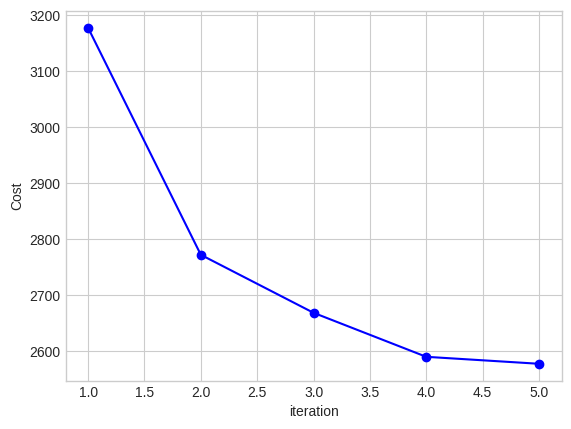

In [ ]:

tsp = tsp_matrix(x,y) # This line will give us m*m matrix of distance between cites. m is total number of cities

Best_solution, best_cost , cost_value = hill_climbing(tsp) # This line of code will find best solution with hill_climbing algorithm

print("\n"+ f"Best solution is {Best_solution} and best cost is {best_cost}")

plot_cost(cost_value)
plt.xlabel("iteration")
plt.ylabel("Cost")